In [1]:
# General
from os import path
from random import randrange

from sklearn.model_selection import train_test_split, GridSearchCV #cross validation
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, make_scorer
from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score

from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

import pickle
import joblib 


## TRAIN SET

In [2]:
trainDataFull = pd.read_csv("trainData.csv")
trainDataFull.head(3)

,v1,v10,v100,v101,v102,v103,v11,v12,v13,v14,...,v91,v92,v93,v94,v95,v96,v97,v98,v99,target
0,1.4,0.0,0.2,1.0,4.2,0.4,0.0,0.0,0.0,1.2,...,0.6,0.2,0.0,3.2,1.0,0.2,0.0,1.6,0.4,9
1,0.0,0.0,0.0,2.8,0.0,0.8,0.0,0.2,1.2,1.4,...,0.0,0.0,1.2,0.0,1.2,0.2,0.2,2.6,2.2,6
2,0.0,0.0,0.0,0.4,0.0,0.6,0.8,0.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.8,0.2,0.8,1.4,0.0,3


In [3]:
trainDataFull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Columns: 104 entries, v1 to target
dtypes: float64(103), int64(1)
memory usage: 49.1 MB


In [4]:
trainDataFull.describe()

,v1,v10,v100,v101,v102,v103,v11,v12,v13,v14,...,v91,v92,v93,v94,v95,v96,v97,v98,v99,target
count,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.077721,0.030062,0.194955,0.561411,0.157148,0.510892,0.339339,0.060755,0.133253,0.528776,...,0.052726,0.316979,0.042697,0.290546,0.617066,0.304186,0.430156,0.837012,0.279162,4.842335
std,0.515539,0.328176,0.737317,1.003366,0.479018,0.786976,0.632642,0.385161,0.639593,0.925803,...,0.151387,0.515414,0.208958,0.742261,0.928514,0.923758,0.804039,1.204724,0.692345,2.510794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.200000,0.000000,0.200000,0.000000,0.000000,0.000000,0.200000,...,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.200000,0.400000,0.000000,5.000000
75%,0.000000,0.000000,0.200000,0.600000,0.200000,0.600000,0.400000,0.000000,0.000000,0.600000,...,0.000000,0.400000,0.000000,0.200000,0.800000,0.200000,0.400000,1.000000,0.200000,7.000000
max,19.400000,17.400000,17.000000,15.200000,13.400000,15.200000,6.600000,12.400000,21.000000,52.600000,...,4.400000,9.800000,9.600000,20.000000,16.600000,15.200000,17.400000,53.200000,18.200000,9.000000


In [5]:
trainData = trainDataFull.loc[:,'v1':'v99']
trainData.head(3)

,v1,v10,v100,v101,v102,v103,v11,v12,v13,v14,...,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99
0,1.4,0.0,0.2,1.0,4.2,0.4,0.0,0.0,0.0,1.2,...,0.2,0.6,0.2,0.0,3.2,1.0,0.2,0.0,1.6,0.4
1,0.0,0.0,0.0,2.8,0.0,0.8,0.0,0.2,1.2,1.4,...,0.0,0.0,0.0,1.2,0.0,1.2,0.2,0.2,2.6,2.2
2,0.0,0.0,0.0,0.4,0.0,0.6,0.8,0.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.8,0.2,0.8,1.4,0.0


In [6]:
trainLabels = trainDataFull.loc[:,'target']
trainLabels.unique()

array([9, 6, 3, 4, 2, 8, 7, 1, 5])

In [7]:
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(trainLabels)
label_encoded_y = label_encoder.transform(trainLabels)
label_encoded_y

array([8, 5, 2, ..., 7, 4, 2])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(trainData.values, 
                                                    label_encoded_y, 
                                                    test_size = 0.3, 
                                                    random_state = 33,
                                                    shuffle = True,
                                                    stratify = label_encoded_y)

## MODEL-2 (Random Forest Classifier)

In [73]:
RFC_model = RandomForestClassifier(n_estimators=800,
                                   verbose=2,
                                   random_state=0,
                                   criterion='gini')
RFC_model

RandomForestClassifier(n_estimators=800, random_state=0, verbose=2)

In [74]:
RFC_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 800
building tree 2 of 800
building tree 3 of 800
building tree 4 of 800
building tree 5 of 800
building tree 6 of 800
building tree 7 of 800
building tree 8 of 800
building tree 9 of 800
building tree 10 of 800
building tree 11 of 800
building tree 12 of 800
building tree 13 of 800
building tree 14 of 800
building tree 15 of 800
building tree 16 of 800
building tree 17 of 800
building tree 18 of 800
building tree 19 of 800
building tree 20 of 800
building tree 21 of 800
building tree 22 of 800
building tree 23 of 800
building tree 24 of 800
building tree 25 of 800
building tree 26 of 800
building tree 27 of 800
building tree 28 of 800
building tree 29 of 800
building tree 30 of 800
building tree 31 of 800
building tree 32 of 800
building tree 33 of 800
building tree 34 of 800
building tree 35 of 800
building tree 36 of 800
building tree 37 of 800
building tree 38 of 800
building tree 39 of 800
building tree 40 of 800
building tree 41 of 800
building tree 42 of 800
b

building tree 334 of 800
building tree 335 of 800
building tree 336 of 800
building tree 337 of 800
building tree 338 of 800
building tree 339 of 800
building tree 340 of 800
building tree 341 of 800
building tree 342 of 800
building tree 343 of 800
building tree 344 of 800
building tree 345 of 800
building tree 346 of 800
building tree 347 of 800
building tree 348 of 800
building tree 349 of 800
building tree 350 of 800
building tree 351 of 800
building tree 352 of 800
building tree 353 of 800
building tree 354 of 800
building tree 355 of 800
building tree 356 of 800
building tree 357 of 800
building tree 358 of 800
building tree 359 of 800
building tree 360 of 800
building tree 361 of 800
building tree 362 of 800
building tree 363 of 800
building tree 364 of 800
building tree 365 of 800
building tree 366 of 800
building tree 367 of 800
building tree 368 of 800
building tree 369 of 800
building tree 370 of 800
building tree 371 of 800
building tree 372 of 800
building tree 373 of 800


building tree 664 of 800
building tree 665 of 800
building tree 666 of 800
building tree 667 of 800
building tree 668 of 800
building tree 669 of 800
building tree 670 of 800
building tree 671 of 800
building tree 672 of 800
building tree 673 of 800
building tree 674 of 800
building tree 675 of 800
building tree 676 of 800
building tree 677 of 800
building tree 678 of 800
building tree 679 of 800
building tree 680 of 800
building tree 681 of 800
building tree 682 of 800
building tree 683 of 800
building tree 684 of 800
building tree 685 of 800
building tree 686 of 800
building tree 687 of 800
building tree 688 of 800
building tree 689 of 800
building tree 690 of 800
building tree 691 of 800
building tree 692 of 800
building tree 693 of 800
building tree 694 of 800
building tree 695 of 800
building tree 696 of 800
building tree 697 of 800
building tree 698 of 800
building tree 699 of 800
building tree 700 of 800
building tree 701 of 800
building tree 702 of 800
building tree 703 of 800


[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   59.1s finished


RandomForestClassifier(n_estimators=800, random_state=0, verbose=2)

In [75]:
# make predictions for test data
y_pred = RFC_model.predict(X_test)
y_pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    2.8s finished


array([1, 1, 8, ..., 5, 1, 1])

In [76]:
predictions = [round(value) for value in y_pred]

In [77]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.88%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.1s finished


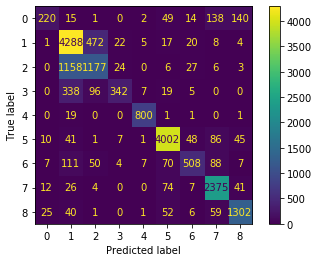

In [78]:
#fig = plt.figure(figsize=(10,10))
plot_confusion_matrix(RFC_model,
                     X_test,
                     y_test,
                     values_format='d')

## Save Valid Score

In [79]:
y_score = RFC_model.predict_proba(X_test)
y_score[0]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.2s finished


array([0.05625, 0.3075 , 0.17375, 0.005  , 0.0125 , 0.135  , 0.09125,
       0.15375, 0.065  ])

In [80]:
valid_score = pd.DataFrame(y_score, columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9'])
valid_score

,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,0.05625,0.30750,0.17375,0.00500,0.01250,0.13500,0.09125,0.15375,0.06500
1,0.00250,0.53500,0.35000,0.07875,0.00125,0.00375,0.02125,0.00250,0.00500
2,0.22250,0.00875,0.00000,0.01375,0.00000,0.01250,0.00500,0.01000,0.72750
3,0.04125,0.03250,0.01375,0.01625,0.00000,0.13000,0.02750,0.11500,0.62375
4,0.00500,0.77750,0.11875,0.06000,0.01000,0.00125,0.02250,0.00125,0.00375
...,...,...,...,...,...,...,...,...,...
18559,0.01125,0.31125,0.62125,0.00000,0.01375,0.00375,0.01500,0.01250,0.01125
18560,0.31625,0.08250,0.07625,0.00500,0.00375,0.05250,0.09750,0.18000,0.18625
18561,0.00500,0.01000,0.00875,0.00375,0.00375,0.91375,0.01875,0.03500,0.00125
18562,0.00000,0.96375,0.01875,0.01750,0.00000,0.00000,0.00000,0.00000,0.00000


In [81]:
valid_score.to_csv('./results/valid-submission-RFC.csv', index = False)

## Save & Load Model

## joblib

In [82]:
# Save the model as a pickle in a file 
joblib.dump(RFC_model, './model/model_RFC.pkl') 
  
# Load the model from the file 
RFC_model_from_joblib = joblib.load('./model/model_RFC.pkl')  
  
# Use the loaded model to make predictions 
RFC_model_predictions = RFC_model_from_joblib.predict(X_test) 

# evaluate predictions
accuracy = accuracy_score(y_test, RFC_model_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Accuracy: 80.88%


[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.1s finished


## GridSearchCV 

In [ ]:
clf = GridSearchCV(RFC_model_model,
                   {'max_depth': [4, 6],
                    'n_estimators': [100, 200]}, 
                    verbose=1,
                   cv=2)
clf.fit(X_train, 
        y_train, 
        early_stopping_rounds=10,
        eval_metric='mlogloss',
        eval_set=[(X_train, y_train), (X_test, y_test)], 
        verbose=True)
print(clf.best_score_)
print(clf.best_params_)

In [ ]:
# Save the model as a pickle in a file 
joblib.dump(clf.best_estimator_, './model/clf.pkl')

# Load the model from the file 
clf_from_joblib = joblib.load('./model/clf.pkl')  

# Use the loaded model to make predictions 
clf_predictions = clf_from_joblib.predict(X_test) 

# evaluate predictions
accuracy = accuracy_score(y_test, clf_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# TEST

In [83]:
testData = pd.read_csv("testData.csv")
testData

,v1,v10,v100,v101,v102,v103,v11,v12,v13,v14,...,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99
0,0.0,0.0,0.0,0.0,0.2,0.2,0.6,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.4,0.2,0.6,5.0,0.0
1,0.0,0.0,0.0,5.2,0.0,0.0,0.0,0.0,1.6,0.8,...,0.0,0.0,0.8,0.0,0.0,3.6,0.4,0.0,2.4,0.0
2,0.0,0.0,0.8,2.2,0.0,0.4,0.0,0.0,0.2,0.0,...,0.0,0.0,0.4,0.0,0.2,1.6,0.6,0.0,0.6,1.6
3,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
4,0.0,0.6,0.2,0.0,0.0,0.4,0.0,0.0,0.0,0.8,...,0.0,0.0,0.6,0.0,0.0,0.2,0.2,0.6,0.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144363,0.0,0.0,0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.4,...,0.0,0.0,0.0,0.0,1.2,0.0,0.4,0.0,0.6,0.0
144364,0.0,0.0,0.0,0.0,0.4,0.0,0.6,0.0,0.0,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,2.6,0.0
144365,0.0,0.0,0.0,0.4,0.2,1.4,1.4,0.0,0.2,0.2,...,0.0,0.6,0.2,0.0,0.2,1.2,0.0,1.4,0.6,0.2
144366,0.0,0.0,0.0,0.2,0.0,0.8,1.2,0.0,0.0,0.4,...,0.0,0.0,0.4,0.0,0.0,0.2,0.2,1.2,1.4,0.0


In [84]:
# Use the loaded model to make predictions 
test_predictions = RFC_model.predict(testData.values)
test_predictions

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   26.3s finished


array([3, 5, 5, ..., 1, 1, 2])

In [85]:
# Use the loaded model to make predictions probability
test_predictions = RFC_model.predict_proba(testData.values)
test_predictions

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   25.9s finished


array([[0.0125 , 0.245  , 0.27375, ..., 0.02625, 0.01375, 0.00375],
       [0.02   , 0.04875, 0.0425 , ..., 0.0125 , 0.32875, 0.0275 ],
       [0.0025 , 0.     , 0.00125, ..., 0.     , 0.00375, 0.00125],
       ...,
       [0.005  , 0.46625, 0.29875, ..., 0.04   , 0.01375, 0.00625],
       [0.     , 0.605  , 0.11125, ..., 0.00625, 0.     , 0.005  ],
       [0.00125, 0.4    , 0.46   , ..., 0.05   , 0.00375, 0.     ]])

In [86]:
result = pd.DataFrame(test_predictions, columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9'])
result

,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,0.01250,0.24500,0.27375,0.40750,0.00000,0.01750,0.02625,0.01375,0.00375
1,0.02000,0.04875,0.04250,0.02000,0.00375,0.49625,0.01250,0.32875,0.02750
2,0.00250,0.00000,0.00125,0.00000,0.00000,0.99125,0.00000,0.00375,0.00125
3,0.00500,0.54875,0.32000,0.05625,0.00000,0.00250,0.00625,0.00875,0.05250
4,0.10875,0.02000,0.00500,0.00250,0.00000,0.03375,0.02125,0.34375,0.46500
...,...,...,...,...,...,...,...,...,...
144363,0.33875,0.05125,0.04125,0.03250,0.00000,0.20875,0.11625,0.04750,0.16375
144364,0.00500,0.38625,0.43000,0.11000,0.00125,0.00250,0.05750,0.00375,0.00375
144365,0.00500,0.46625,0.29875,0.15750,0.00375,0.00875,0.04000,0.01375,0.00625
144366,0.00000,0.60500,0.11125,0.27125,0.00000,0.00125,0.00625,0.00000,0.00500


In [87]:
result.to_csv('./results/test-submission-RFC.csv', index = False)

## REFERENCES

1- https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

2- https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py

3- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

4- https://www.datacamp.com/community/tutorials/xgboost-in-python

5- https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier

6- https://www.datacamp.com/community/tutorials/random-forests-classifier-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=aud-392016246653:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1012782&gclid=EAIaIQobChMI49HTjNO06wIVB-ztCh23nwMLEAAYASAAEgKKEvD_BwE